# Идея поиска с возвратом

Рассмотрим структуру переборных алгоритмов с возвратом, осуществляющих последовательный перебор всех допустимых комбинаций. В даннам случае структура перебираемого множеста определяется динамически с помощью функции расширения частичных решений. 

## Задача о восьми ферзях

***Задача.*** Расставить на шахматной доске восеми ферзей так, чтобы они не били друг друга.

Для простоты рассмотрим досук размерами 4x4 и соотвественно четырьмя ферзями.

Для осуществления перебора заметим, что каждый ферзь должен стоять на отдельной вертикали. Поставим 1-го ферзя на первую клетку первой вертикали и запомним частичное решение как ($A1$).

Теперь будем пытаться поставить 2-го ферзя на вторую вертикаль так, чтобы он и 1-й не били друг друга. Первая и вторая позиции вертикали не подходят, поэтому ферзя ставим на $B3$. Полученное частичное решение запомним как ($A1 \rightarrow B3$). Попробуем расширить полученное частичное решение, но все клетки третьей находятся под боем поставленных ферзей. Таким образом, ты зашли в тупик.

В этом случае, используя зранящееся частичное решение, делаем шаг назад и пробуем следующее ресширение первого частичного решения: ($A1\rightarrow B4$). Можно сделать еще один шаг: ($A1 \rightarrow B4 \rightarrow C2$), однако дальнейшее расширение невозможно.

![Ход решения из позиции ($A1$)](./images/queens_problem_1.png)

Возвращаемся назад, но других расширений для ($A1 \rightarrow B4$) нет. Делаем еще шаг назад, но у ($A1$) также нет других расширений, поэтому делаем еще шаг назац и меняем первый ход на ($A2$).

Ход успешного решения из позиции ($A2$) изображен на рисунке ниже.

![Ход успешного решения из позиции ($A2$)](./images/queens_problem_2.png)

Возвращаемся назад и делаем первый ход на ($A3$). Последовательность нахождения решения для этого случая показана на рисунке ниже.

![Ход успешного решения из позиции ($A3$)](./images/queens_problem_3.png)

Поиск решения из начальной позиции ($A4$) показан на рисунке ниже. Здесь мы заходим в тупик, решения в этом случае нет.

![Ход решения из позиции ($A4$)](./images/queens_problem_4.png)


## Метод ветвей и границ

Пусть на перебираемом множестве (множестве решений) $P$ задана целевая вещественная вункция $f$. Рассмотрим задачу нахождения элемента множества, для которого значение функции $f$ минимально.

В этом случае объем перебора можно существенно уменьшить, если ввести на множестве частичных решений оценочную функцию $b(x)$.

Функция $b(x)$ подбирается так, чтобы давать нижнюю оценку для значения целевой функции на решении, получающемся последовательным рассмотрением данного частичного решения.

***Определение.*** Функцию $b$ называют *оценочной* для целевой функции $f$, если $b(x) \leq f(p)$ для любого частичного решения $x$, приводящего к $p$, т.е. если существует последовательность расширений $y_1, y_2, ..., y_k$, такая, что
$$ p = x \bullet y_1 \bullet y_2 \bullet ... \bullet y_k \text{, где} y_i \in ext(x \bullet y_1 \bullet y_2 \bullet ... \bullet y_{i-1}) $$

# Метод Монте-Карло

Существуют задачи, решать которые детерменитрованно вычислительно сложно/долго.

Суть метода Монте-Карло $-$ использование и подбор такой случайной величины, что вычисление ее математического ожидания дает приближенное решение данной задачи.

Желательно понимать насколько точно происходит решение в худшем случае.

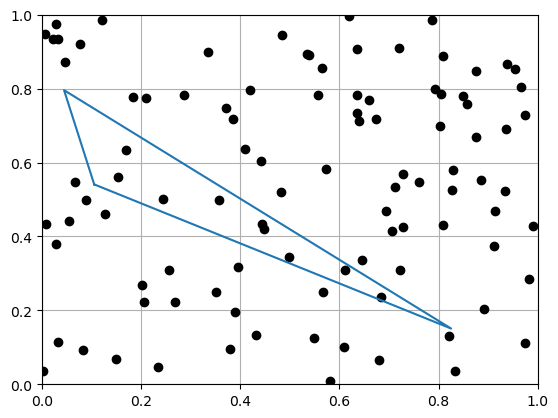

In [1]:
import matplotlib.pyplot as plt
from random import random, randrange
from math import pi, sin, cos

def get_random_array(points_amount):
    return [random() for _ in range(points_amount)]

points_amount = 100

plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.plot(get_random_array(points_amount), get_random_array(points_amount), 
         linestyle='none', marker='o', color='black')
x = get_random_array(3)
x.append(x[0])
y = get_random_array(3)
y.append(y[0])
plt.plot(x, y)
plt.show()


***Задача.*** Нахождение площади сложной фигуры методом Монте-Карло.
Пусть известна область, в которой находится данная фигура.

Случайным образом расположим в данной точки, тогда площадь фигуры можно оценить следующим образом:
$$ p = {k \over n} P \text{, где} $$
$k$ $-$ число точек, попавших в фигуру, $n$ $-$ общее число точек, $P$ $-$ площадь всей области.

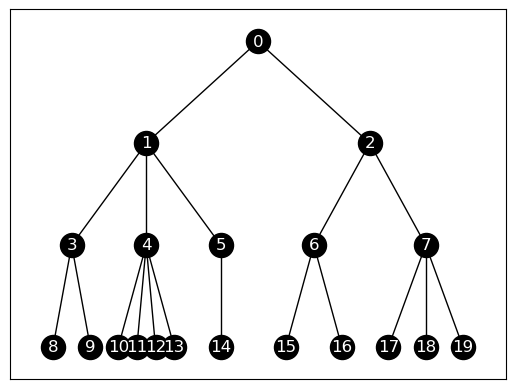

In [22]:
import networkx as nx

def hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
    if pos is None:
        pos = {root:(xcenter,vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    
    children = list(G.neighbors(root))
    
    if not isinstance(G, nx.DiGraph) and parent is not None:
        children.remove(parent)  
    
    if len(children)!=0:
        dx = width/len(children) 
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos = hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                pos=pos, parent = root)
    return pos

tree = nx.Graph()

tree.add_edge(0, 1)
tree.add_edge(0, 2)
tree.add_edge(1, 3)
tree.add_edge(1, 4)
tree.add_edge(1, 5)
tree.add_edge(2, 6)
tree.add_edge(2, 7)
tree.add_edge(3, 8)
tree.add_edge(3, 9)
tree.add_edge(4, 10)
tree.add_edge(4, 11)
tree.add_edge(4, 12)
tree.add_edge(4, 13)
tree.add_edge(5, 14)
tree.add_edge(6, 15)
tree.add_edge(6, 16)
tree.add_edge(7, 17)
tree.add_edge(7, 18)
tree.add_edge(7, 19)

nx.draw_networkx(tree, node_color='black', font_color='white', pos=hierarchy_pos(tree, 0))
plt.show()

***Задача.*** Приближенно найти число вершин в дереве.

Случайным образом совершим несколько обходов дерева от корня до листьев.

Пусть обходы будут следующими:

1. $0 \rightarrow 1 \rightarrow 3 \rightarrow 8$
2. $0 \rightarrow 1 \rightarrow 4 \rightarrow 12$
3. $0 \rightarrow 1 \rightarrow 5 \rightarrow 15$

Будем считать, что дерево 'равномерно'.

Тогда найдем примерное число вершин при каждом обходе:
1. $1 + 2\cdot1 + 3\cdot2\cdot1 + 2\cdot3\cdot2\cdot1 + 0\cdot2\cdot3\cdot2\cdot1 = 21$
2. $1 + 2\cdot1 + 3\cdot2\cdot1 + 4\cdot3\cdot2\cdot1 + 0\cdot4\cdot3\cdot2\cdot1 = 33$
3. $1 + 2\cdot1 + 3\cdot2\cdot1 + 1\cdot3\cdot2\cdot1 + 0\cdot1\cdot3\cdot2\cdot1 = 15$

Тогда итоговая оценка числа вершин равна среднему арифметическому:
$$ {21 + 33 + 15 \over 3} = 23 \approx 20 $$

Для того, чтобы применять метод Монте-Карло, нужно знать функцию распределения случайной величины для конкретной задачи, а также пределы генерирования даннай случайной величины.
